Hồ Thị Thanh Ngân

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Data Analyst Intern')

Data Analyst Intern


A.Data Preprocessing


1.Read data file

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/Nganho22/rvPython/refs/heads/main/Copy%20of%20churn-bigml-20.csv", header=0, index_col=None)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


2.Get Data types & Data meaning

In [12]:
print('Data describe:')
print(df.info())
print(df.describe())

Data describe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667

In [13]:
print(df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


B. Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_23760\3180116907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


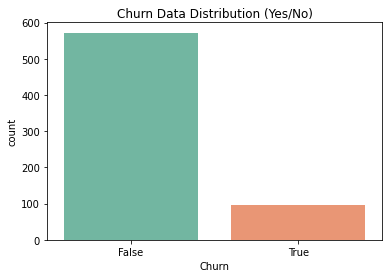

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Data Distribution (Yes/No)')
plt.show()


1. Explore the relationship between independent variables and target variable Churn

In [48]:

churn_median = df[df['Churn'] == True]['Account length'].median()
no_churn_median = df[df['Churn'] == False]['Account length'].median()
print(f'Median service time of those who leave: {churn_median}')
print(f'Median service time of those who leave: {no_churn_median}')

Median service time of those who leave: 102.0
Median service time of those who leave: 102.0


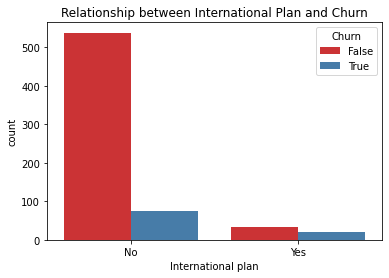

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x='International plan', hue='Churn', data=df, palette='Set1')
plt.title('Relationship between International Plan and Churn')
plt.show()

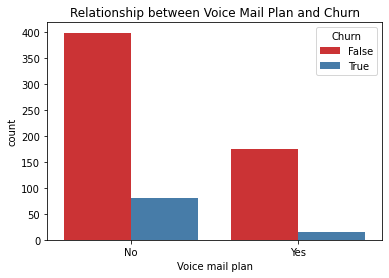

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='Voice mail plan', hue='Churn', data=df, palette='Set1')
plt.title('Relationship between Voice Mail Plan and Churn')
plt.show()

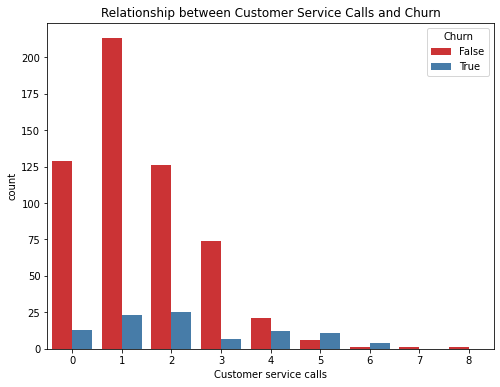

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Set1')
plt.title('Relationship between Customer Service Calls and Churn')
plt.show()


2. Analysis the Numerical Attributes with Churn

C:\Users\user\AppData\Local\Temp\ipykernel_23760\3434500710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total day minutes', data=df, palette='Set2')


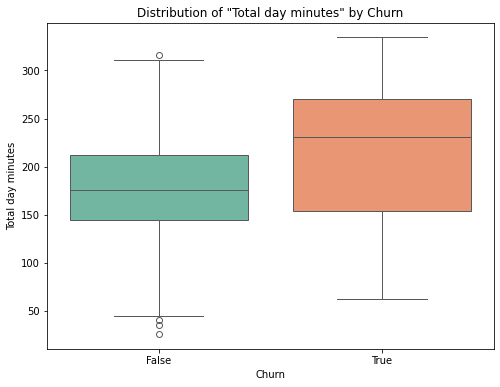

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Total day minutes', data=df, palette='Set2')
plt.title('Distribution of "Total day minutes" by Churn')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23760\2387669745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total intl minutes', data=df, palette='Set2')


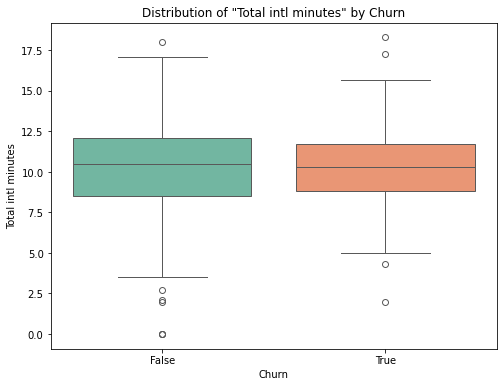

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Total intl minutes', data=df, palette='Set2')
plt.title('Distribution of "Total intl minutes" by Churn')
plt.show()

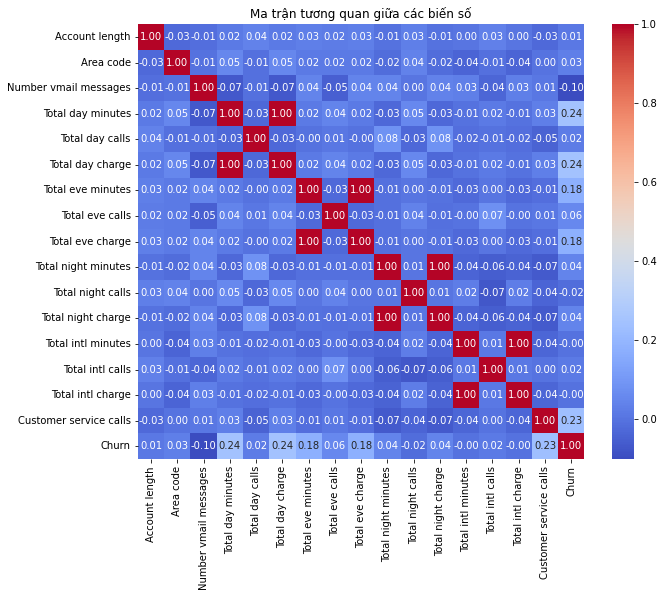

In [57]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

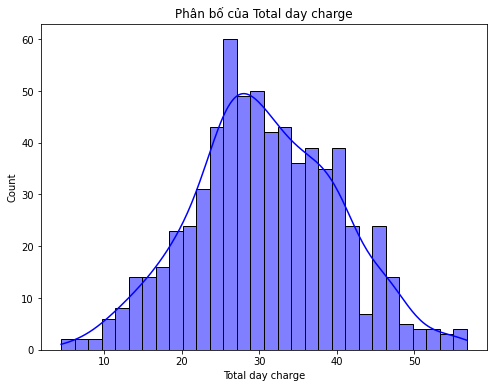

In [58]:
plt.figure(figsize=(8,6))
sns.histplot(df['Total day charge'], kde=True, color='blue', bins=30)
plt.title('Phân bố của Total day charge')
plt.show()

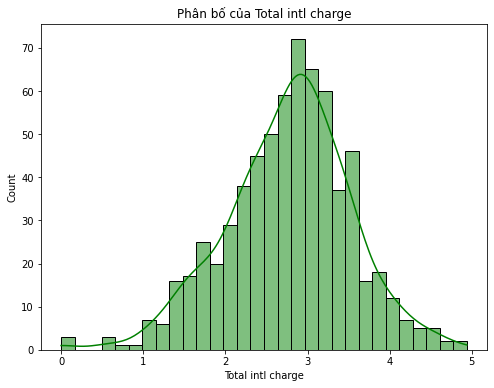

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(df['Total intl charge'], kde=True, color='green', bins=30)
plt.title('Phân bố của Total intl charge')
plt.show()